<a href="https://colab.research.google.com/github/nars95/machine_learning/blob/main/classification_minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mnist = fetch_openml('mnist_784', version =1,  as_frame = False)

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

os dados mnist já estão seprados aleatoriamente em treino e teste.
As primeiras 60000 instâncias são reservadas para treino, enquanto as restantes para teste.

In [5]:
data, labels = mnist['data'], mnist['target']

In [6]:
labels[0]

'5'

In [7]:
labels = labels.astype(np.uint8) # convertendo de string para unsigned int

In [8]:
labels[0]

5

In [9]:
some_digit = data[0]

In [10]:
X_train, X_test, y_train, y_test = data[:60000], data[60000:], labels[:60000], labels[60000:]

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [ ]:
from sklearn.svm import SVC

As máquinas de vetores de suporte são estritamente classificadores binários.
Todavia, o sklearn SVC implementa a classificação multiclasse ou multinomiais por meio da técnica One-versus-One(OvO). Para n classes, serão treinados n(n-1)/2 classificadores. Nesse caso, serão treinados 45 classificadores, obteve os scores de decisão e selecionou o maior score, tal como vemos abaixo:

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)

SVC()

In [ ]:
#salvando o modelo
import joblib
joblib.dump(svm_classifier,"svm_model.pkl")

['svm_model.pkl']

In [ ]:
svm_classifier.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
svm_scores = svm_classifier.decision_function([some_digit])
svm_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(svm_scores)

5

In [ ]:
lista = [10,20,30,50]
np.argmax(lista)

3

In [ ]:
svm_classifier.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

É possível escolher estratégia que deve ser implementada: one-versus-one
ou one-versus-the-rest. O código abaixo mostra esse procedimento

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
one_vs_rest_clf = OneVsRestClassifier(SVC())
one_vs_rest_clf.fit(X_train, y_train)
one_vs_rest_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
one_vs_rest_clf.estimators_

[SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()]

In [ ]:
len(one_vs_rest_clf.estimators_)

10

Analisando o SGDClassifier

In [13]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd_clf = SGDClassifier(random_state= 42)

In [17]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit]) # o modelo errou: deu um alto score para o número 3 como vemos na célula abaixo

array([3], dtype=uint8)

In [20]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [22]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

o classificador obteve um bom desempenho. Mas ainda é possível melhorá-lo por meio do escolanamento ou padronização dos dados.

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

In [28]:
cross_val_score(sgd_clf, X_train_scaler, y_train, cv = 3 , scoring = "accuracy") # as métricas melhoraram com o escalonamento

array([0.8983, 0.891 , 0.9018])

In [30]:
sgd_predict = cross_val_predict(sgd_clf, X_train_scaler, y_train, cv = 3)

In [35]:
cm = confusion_matrix(y_train, sgd_predict)

In [37]:
cm

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

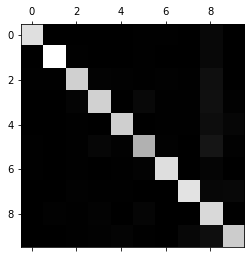

In [38]:
plt.matshow(cm, cmap = plt.cm.gray)

In [39]:
rows_sums = cm.sum(axis = 1, keepdims = True)
rows_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [42]:
norm_conf_matrix = cm/ rows_sums
np.fill_diagonal(norm_conf_matrix, 0) 

é notório pela matrix abaixo que muitas classes foram classificadad como número 8. O número cinco foi confundido com número 3. Isso pode ser visto pela cor mais clara.

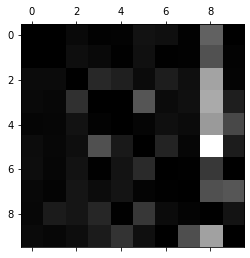

In [43]:
plt.matshow(norm_conf_matrix, cmap = plt.cm.gray)